# Proyek analisis data:Bike Sharing Dataset

- Nama: Andry Septian Syahputra Tumaruk
- Email: andryg9501@gmail.com
- ID Dicoding: MC476D5Y0692

# Menentukan Pertanyaan Bisnis

- pada musim apa penyewaan sepeda tertinggi terjadi?
- Kapan waktu tertinggi penyewaan sepeda terjadi dalam sehari?

# Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
day=pd.read_csv("data/day.csv")
hour=pd.read_csv("data/hour.csv")

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- mengumpulkan data penyewaan sepeda berdasarkan hari
- mengumpulkan data penyewaan sepeda berdasarkan jam

# Assessing Data

## Menilai tabel day_df

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("jumlah duplikasi",day.duplicated().sum())
day.describe()

jumlah duplikasi 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Menilai tabel hour_df

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("jumlah duplikasi:",hour.duplicated().sum())
hour.describe()

jumlah duplikasi: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**insight:**

- berdasarkan dataset dari file day.csv dan hour.csv tidak terdapat duplikasi data
- tidak terdapat data yang kosong dari file day.csv dan hour.csv tapi terdapat tipe data yang salah di day.csv dan hour.csv di kolom dteday

# Cleaning Data

## Membersihkan tabel day dan hour

In [9]:
dteday_column=["dteday"]
for column in dteday_column:
    day[column]= pd.to_datetime(day[column])
    hour[column]=pd.to_datetime(hour[column])

In [10]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**insight:**
- membersihkan data dengan mengubah tipe data pada data day.csv yang awalnya string menjadi datetime
- sama hal nya dengan data day.csv pada hour.csv akan dibersihkan datanya dengan mengubah tipe datanya 

# EXPLORE DATA Analysis(EDA)

In [12]:
concat=[day,hour]
result=pd.concat(concat)
result.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


In [13]:
result.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                             
       nunique   max min        mean          std
season                                           
1         4242  7836   1  213.134976   580.856754
2         4593  8362   1  399.995210  1014.398592
3         4684  8714   1  453.086678  1117.906961
4         4410  8555   1  381.683900   971.017357

<Axes: xlabel='cnt', ylabel='Count'>

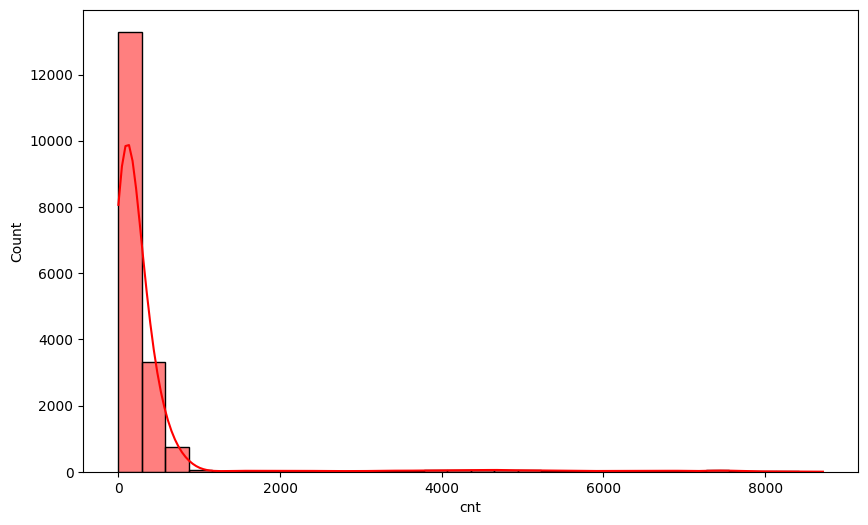

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(result['cnt'], bins=30, kde=True, color='red')

**Insight:**
- berdasarkan pivot tabel,dapat diketahui di bahwa penyewa sepeda di dominasi di musim 3 dari berkisar 1 sampai 8714
- berdasarkan bar chart dapat diketahui bahwa persebarannya data dari gabungan data day dan hour itu right-skewed

# Visualization & Explanatory Analysis

**Pertanyaan 1:**
pada musim apa penyewaan sepeda tertinggi terjadi?

C:\Users\Andry\AppData\Local\Temp\ipykernel_14296\3994364263.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Rata-rata Jumlah Penyewaan')

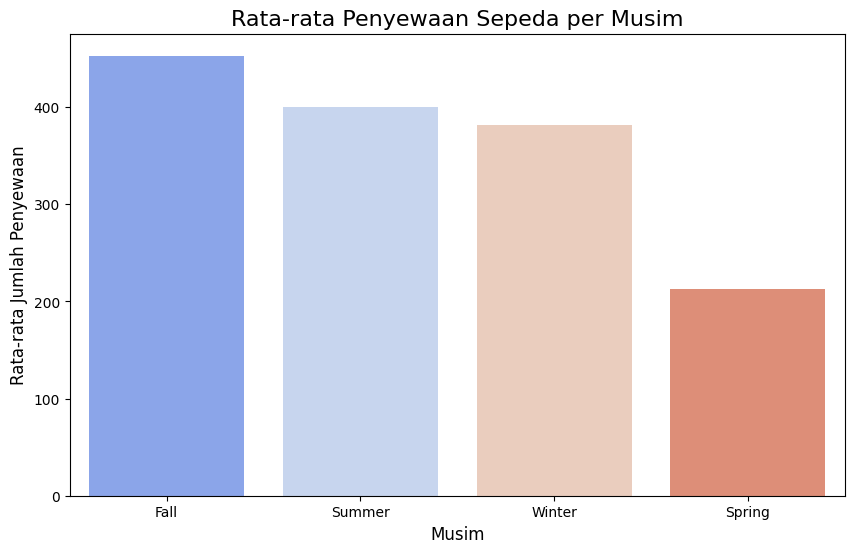

In [15]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
result['season_name'] = result['season'].map(season_mapping)

season_avg = result.groupby('season_name')['cnt'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x=season_avg.index, 
    y=season_avg.values, 
    palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda per Musim',loc='center', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)

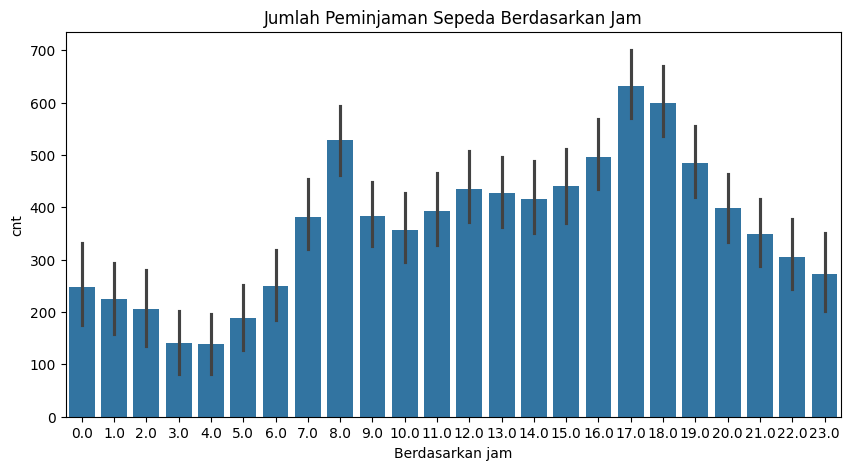

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=result["hr"], y=result["cnt"])
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Berdasarkan jam")
plt.show()

**Insight:**
- penyewaan sepeda paling banyak diminati yaitu di musim gugur
- waktu paling banyak orang-orang menyewa sepeda pada sore hari di sekitar jam 17:00 dan yang kedua di pagi hari di sekitar jam 8:00

# Analisis lanjutan

## menggunakan teknik binning

C:\Users\Andry\AppData\Local\Temp\ipykernel_14296\1892211916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clustered_data.index, y=clustered_data.values, palette='magma',legend=False)


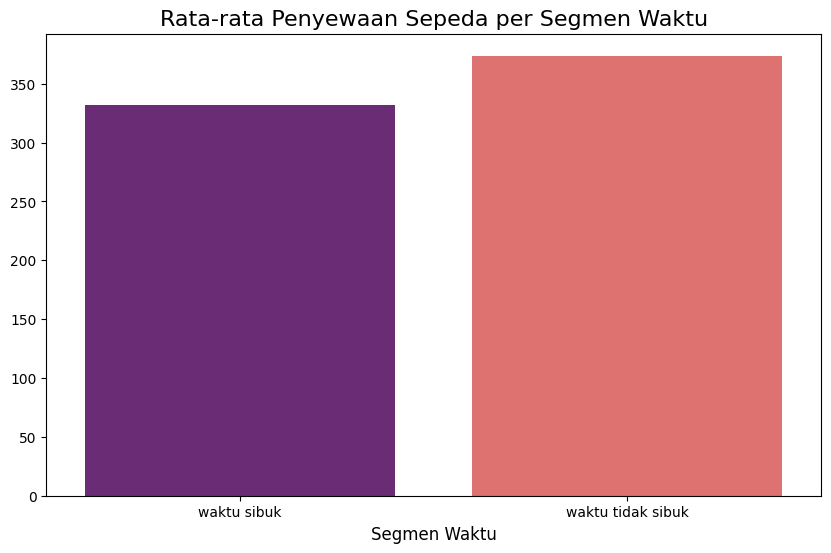

In [17]:
result["time_category"] = result["hr"].apply(lambda x: "waktu sibuk" if 7 <= x <= 9 or 17 <= x <= 19 else "waktu tidak sibuk")

clustered_data = result.groupby("time_category")["cnt"].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=clustered_data.index, y=clustered_data.values, palette='magma',legend=False)
plt.title('Rata-rata Penyewaan Sepeda per Segmen Waktu', fontsize=16)
plt.xlabel('Segmen Waktu', fontsize=12)
plt.show()

# Conclusion

**pertanyaan 1:**
- fall(gugur) adalah segmentasi musim dengan rata-rata penyewaan sepeda tertinggi dibandingkan dengan segmen musim lainnya dikarenakan pada musim tersebut kondisi yang sangat paling nyaman dan rileks dikarenakan angin pada musim gugur sangat menyejukkan bagi para pengguna penyewa sepeda

**pertanyaan 2:**
- berdasarkan waktu penyewa sepeda paling tinggi yaitu di sore hari tepatnya di jam 17:00 dikarenakan di jam tersebut para penyewa sepeda banyak memiliki waktu luang atau aktivitas santai

In [19]:
result.to_csv('main-bike-sharing.csv',index=False)